In [1]:
import os
import torch
import pandas as pd
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# import torchvision.transforms.functional
# import torchvision.transforms.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn

from torchinfo import summary
from tqdm import tqdm

# Planet : Amazon space -- Full model running for multilabel classification

!! This is supposed to become the main jupyternotebook to run the multilabel classification and testing !!

Usefull links:
<https://learnopencv.com/multi-label-image-classification-with-pytorch-image-tagging/>

## 0) Initialization
### 0.1) Getting Module and Functions

In [33]:
from Multilabel_Amazon_Engine import checking_folder, train, show_4_image_in_batch, batch_prediction
from Multilabel_Amazon_Module import AmazonSpaces, MultiLayerCNN, AdjustSaturation

In [3]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, "+str(data_folder)

## 1) Putting the model on the gpu

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [5]:
model = MultiLayerCNN().to(device)

### + Load previously trained model

In [6]:
if device=="cpu":
    model.load_state_dict(torch.load('model_multilabel_classification.pth', map_location=torch.device('cpu')))
else:
    model.load_state_dict(torch.load('model_multilabel_classification.pth'))

In [7]:
model.eval()

MultiLayerCNN(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool_max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool_avg): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (fc): Linear(in_features=14580, out_features=17, bias=True)
  (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): BCELoss()
  (sig): Sigmoid()
)

## 2) Getting the different datasets

In [8]:
train_csv = 'training.csv'
validation_csv = 'validation.csv'
test_csv = 'test.csv'

In [9]:
Transform_choice = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(256),transforms.RandomAutocontrast(p=1), AdjustSaturation(1.2)])

In [10]:
train_dataset = AmazonSpaces(csv_file=train_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
validation_dataset = AmazonSpaces(csv_file=validation_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
test_dataset = AmazonSpaces(csv_file=test_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)

## 3) Wrapping into the different dataloaders

In [11]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,drop_last = True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size,drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)

## 4) Choice of Criterion and Opitimizer

In [13]:
learning_rate = 0.01

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 5) TRAINING

In [14]:
epochs_number = 2

The_results = train(model, train_dataloader, validation_dataloader, device=device, optimizer= optim, lr = learning_rate, epochs=epochs_number, loss_fn=criterion)

Training


0it [00:00, ?it/s]C:\Users\gezas\.conda\envs\IPEO_gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
1it [00:03,  3.30s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], calculated accuracy score: 0.8823529411764706, prediction score : 0.0, recall score: 0.0
Loss : 0.6818896659520653, calculated accuracy score: 0.8823529411764706, prediction score : 0.0, recall score: 0.0


C:\Users\gezas\.conda\envs\IPEO_gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
2it [00:04,  2.15s/it]C:\Users\gezas\.conda\envs\IPEO_gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
21it [00:27,  1.24s/it]

Loss : 0.3393657433677544, calculated accuracy score: 0.96312587535014, prediction score : 0.8571428571428571, recall score: 0.6865699404761905


41it [00:50,  1.08s/it]

Loss : 0.18696600018486031, calculated accuracy score: 0.9811132532281205, prediction score : 0.926829268292683, recall score: 0.8394626524390244


61it [01:12,  1.19s/it]

Loss : 0.12858153712468512, calculated accuracy score: 0.9873056292189006, prediction score : 0.9508196721311475, recall score: 0.8920978483606558


81it [01:37,  1.28s/it]

Loss : 0.12268090686762724, calculated accuracy score: 0.9837792755991286, prediction score : 0.9384657058073828, recall score: 0.8856381894258757


101it [02:01,  1.21s/it]

Loss : 0.14949334079730037, calculated accuracy score: 0.9699739735002912, prediction score : 0.8830197327102114, recall score: 0.8094179700342641


121it [02:23,  1.07s/it]

Loss : 0.15341354646042415, calculated accuracy score: 0.9648418509965969, prediction score : 0.8834309149074102, recall score: 0.8014501830214198


141it [02:45,  1.09s/it]

Loss : 0.17538410820726164, calculated accuracy score: 0.9531380371297453, prediction score : 0.879962168573563, recall score: 0.7699013276621438


161it [03:06,  1.08s/it]

Loss : 0.19310002030929221, calculated accuracy score: 0.9372402493606139, prediction score : 0.8675957000267611, recall score: 0.7249600127971089


181it [03:28,  1.07s/it]

Loss : 0.21429011074802928, calculated accuracy score: 0.9238858872278194, prediction score : 0.8557650739472563, recall score: 0.6842074596747034


187it [03:34,  1.15s/it]


Validating


62it [01:00,  1.03it/s]


Training


1it [00:01,  1.13s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0
Loss : 0.17777087382460996, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


21it [00:22,  1.05s/it]

Loss : 0.04896051328525215, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


41it [00:43,  1.10s/it]

Loss : 0.02937423441207888, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


61it [01:04,  1.03s/it]

Loss : 0.02123902365702106, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


81it [01:24,  1.01s/it]

Loss : 0.0412245493684718, calculated accuracy score: 0.9911776053013799, prediction score : 0.9686509189113356, recall score: 0.9556131122653818


87it [01:30,  1.00it/s]C:\Users\gezas\.conda\envs\IPEO_gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
88it [01:31,  1.01it/s]C:\Users\gezas\.conda\envs\IPEO_gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
92it [01:35,  1.03it/s]C:\Users\gezas\.conda\envs\IPEO_gpu\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
93it [01:36,  1.

Loss : 0.09124692258445492, calculated accuracy score: 0.9696236167734421, prediction score : 0.8584258085263654, recall score: 0.8095339972619869


121it [02:04,  1.00it/s]

Loss : 0.10972194755614052, calculated accuracy score: 0.9625896329606223, prediction score : 0.8658045871995457, recall score: 0.7875733689469402


141it [02:25,  1.03s/it]

Loss : 0.13829904388668704, calculated accuracy score: 0.9504393512724237, prediction score : 0.8651460794551015, recall score: 0.7548542690530544


161it [02:45,  1.02it/s]

Loss : 0.16020386983501872, calculated accuracy score: 0.9351451178297405, prediction score : 0.8553197004322731, recall score: 0.7119258992725026


181it [03:05,  1.00s/it]

Loss : 0.18452998330839637, calculated accuracy score: 0.9225909977250569, prediction score : 0.8446889048988172, recall score: 0.6752685584403996


187it [03:12,  1.03s/it]


Validating


62it [00:56,  1.09it/s]


## 5b) Saving the results into a Json file

In [15]:
The_results

{'train_loss': [[0.6818896659520653,
   0.6629121522766368,
   0.6401277548576378,
   0.6177168385164644,
   0.5870182704941672,
   0.5513827497796977,
   0.5121315196019542,
   0.46152129666605857,
   0.4118759389008012,
   0.36148952518124133,
   0.3056254425764029,
   0.25675090535215156,
   0.21337034283137388,
   0.1775923871935126,
   0.15009365836671992,
   0.12922431520329317,
   0.10487222236149725,
   0.09269869280165842,
   0.08134013422343687,
   0.06946151500682497,
   0.05758528257924541,
   0.05572913321919473,
   0.049321239980225286,
   0.044242638889580334,
   0.04357995345868831,
   0.038499406336032896,
   0.033587035077503324,
   0.02786130129772894,
   0.030435000953596445,
   0.024701114885508156,
   0.021839365479750353,
   0.021163084305057697,
   0.019823144343557513,
   0.018812463677290104,
   0.018367370676474714,
   0.01634351431440497,
   0.017092535506168027,
   0.013788743218315979,
   0.016094254914030576,
   0.015609074436470645,
   0.0120350218868519

In [24]:
import json

# create json object from dictionary
js = json.dumps(The_results)

# open file for writing, "w"
name = f"training_results_{epochs_number}epochs_{batch_size}batchsize_{criterion}_{str(optim).split()[0]}optim.json"
f = open(name,"a")

# write json object to file
f.write(js)

# close file
f.close()

## 5c) Plotting the training phases metrics

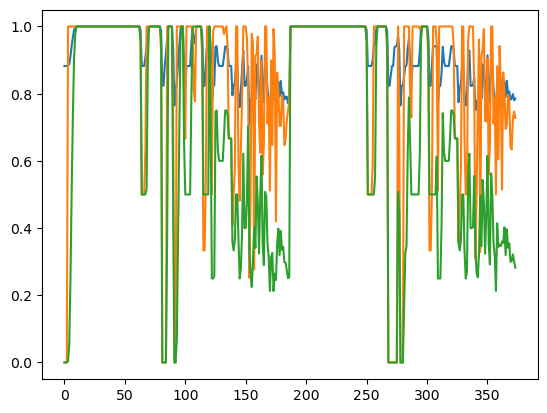

In [28]:
plt.figure()
plt.plot(np.array(The_results['train_acc_scores']).flatten())
plt.plot(np.array(The_results['train_prec_scores']).flatten())
plt.plot(np.array(The_results['train_rec_scores']).flatten())
plt.show()

In [ ]:
plt.figure()
plt.plot(np.array(The_results['train_acc_scores']).flatten())
plt.plot(np.array(The_results['train_prec_scores']).flatten())
plt.plot(np.array(The_results['train_rec_scores']).flatten())
plt.show()

## 6) TESTING

In [35]:
# store stats
losses, accuracies = [], []
count = 0
for batch in tqdm(test_dataloader):
    # TODO run prediction_step
    loss, accuracy, predictions = batch_prediction(batch, model, device = 'cuda')

    # append to stats
    losses.append(loss)
    accuracies.append(accuracy)
    if count == 0:
        all_pred = predictions
        count = 1
    else :
        all_pred = np.vstack((all_pred,predictions))
# average val losses and accuracies over batches
losses, accuracies = np.stack(losses).mean(), np.stack(accuracies).mean()
print(f"valloss {losses:.2f}, val accuracy {accuracies*100:.2f}")

100%|██████████| 65/65 [01:00<00:00,  1.08it/s]

valloss 0.30, val accuracy 87.80


In [36]:
all_pred

array([[0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [0.3828125, 0.8359375, 0.75     , ..., 0.984375 , 0.90625  ,
        0.9375   ],
       [0.3984375, 0.84375  , 0.75     , ..., 0.953125 , 0.859375 ,
        0.9296875],
       [0.3984375, 0.84375  , 0.7265625, ..., 0.9140625, 0.8984375,
        0.8125   ]])

<BarContainer object of 17 artists>

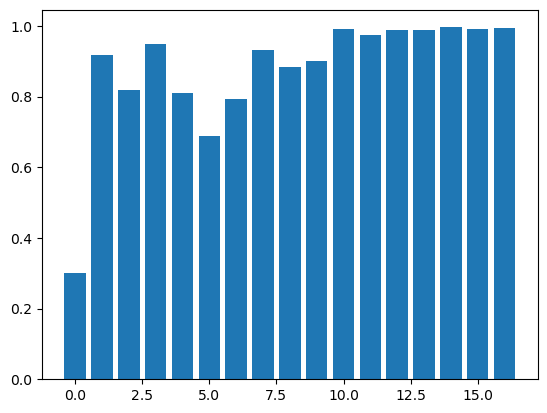

In [39]:
mean_pred = np.stack(all_pred, axis = 0).mean(axis=0)
plt.figure()
plt.bar(x = range(17), height=mean_pred)

# Saving Models

In [14]:
torch.save(model.state_dict(), "model_multilabel_classification.pth")
print("Saved PyTorch Model State to model_multilabel_classification.pth")

Saved PyTorch Model State to model_multilabel_classification.pth
